Pre-processing Round 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [5]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [6]:
df[df["clean_comment"].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [7]:
df[df["clean_comment"].isna()]["category"].value_counts()

,count
category,
0,100


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(350)

In [10]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df[df["clean_comment"].str.strip() == ""]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [13]:
df = df[~(df["clean_comment"].str.strip() == "")]

In [14]:
df["clean_commnet"] = df["clean_comment"].str.lower()

In [15]:
df.head()

,clean_comment,category,clean_commnet
0,family mormon have never tried explain them t...,1,family mormon have never tried explain them t...
1,buddhism has very much lot compatible with chr...,1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...,-1,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...,0,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...,1,for your own benefit you may want read living ...


In [16]:
df[df["clean_comment"].apply(lambda x: x.endswith(" ") or x.startswith(" "))]

,clean_comment,category,clean_commnet
0,family mormon have never tried explain them t...,1,family mormon have never tried explain them t...
1,buddhism has very much lot compatible with chr...,1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...,-1,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...,0,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...,1,for your own benefit you may want read living ...
...,...,...,...
37241,let the janta decide not ulema clerics,0,let the janta decide not ulema clerics
37242,hona hai same with vaccination education insu...,0,hona hai same with vaccination education insu...
37246,downvote karna tha par upvote hogaya,0,downvote karna tha par upvote hogaya
37247,haha nice,1,haha nice


In [17]:
df["clean_comment"] = df["clean_comment"].str.strip()

In [18]:
df["clean_comment"].apply(lambda x: x.endswith(" ") or x.startswith(" ")).sum()

np.int64(0)

In [19]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls.head()


,clean_comment,category,clean_commnet


In [20]:
comments_with_newline = df[df["clean_comment"].str.contains("\n")]
comments_with_newline.head()

,clean_comment,category,clean_commnet
448,what missing jpg\nand why this brilliant edit ...,1,what missing jpg\nand why this brilliant edit ...
781,india has been ruined congress and populist sc...,-1,india has been ruined congress and populist s...
847,like aap for its stand corruption and making p...,-1,like aap for its stand corruption and making ...
871,reduced trade\ndeficit stronger rupee aren the...,0,reduced trade\ndeficit stronger rupee aren th...
1354,amsa press conference australian maritime safe...,1,amsa press conference australian maritime safe...


In [21]:
df["clean_comment"] = df["clean_comment"].str.replace("\n"," ",regex=True)
comments_with_newline_rem = df[df["clean_comment"].str.contains("\n")]
comments_with_newline_rem

,clean_comment,category,clean_commnet


EDA Round 1

<Axes: xlabel='category', ylabel='count'>

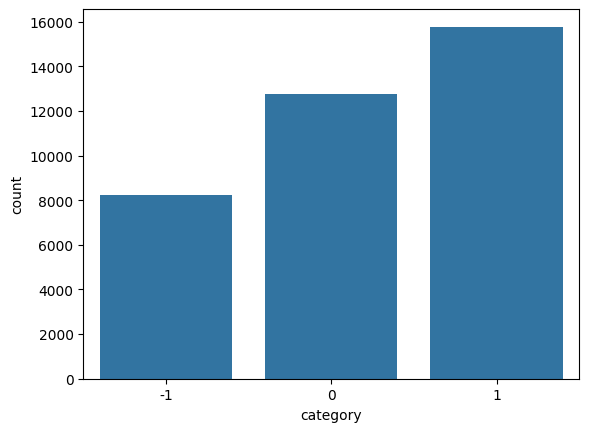

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x="category")

In [23]:
df["category"].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [24]:
df["word_count"] = df["clean_comment"].apply(lambda x: len(x.split()))

In [25]:
df.sample(5)

,clean_comment,category,clean_commnet,word_count
9176,eli5 how does this help reducing inflation how...,1,eli5 how does this help reducing inflation how...,93
27323,over four times increase aid allocation for i...,0,over four times increase aid allocation for ...,23
20835,this psycho strikes again,0,this psycho strikes again,4
35115,bohot hard,-1,bohot hard,2
28779,finally found the contract for aim120c aspx co...,-1,finally found the contract for aim120c aspx co...,94


In [26]:
df["word_count"].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


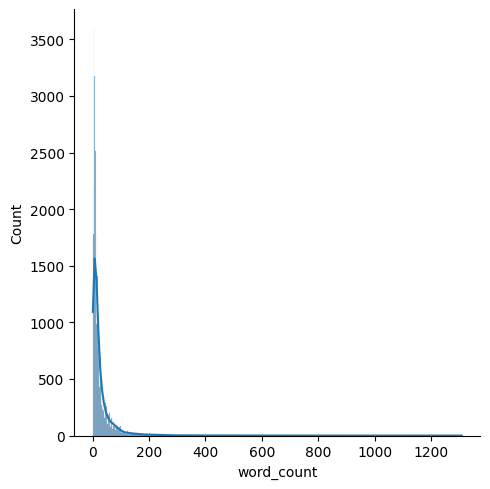

In [27]:
sns.displot(df["word_count"],kde=True)

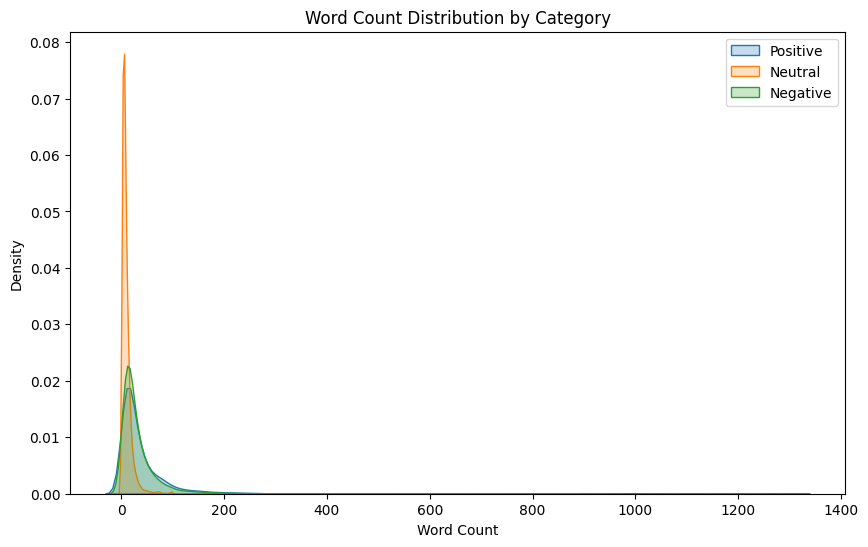

In [28]:

plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)


plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

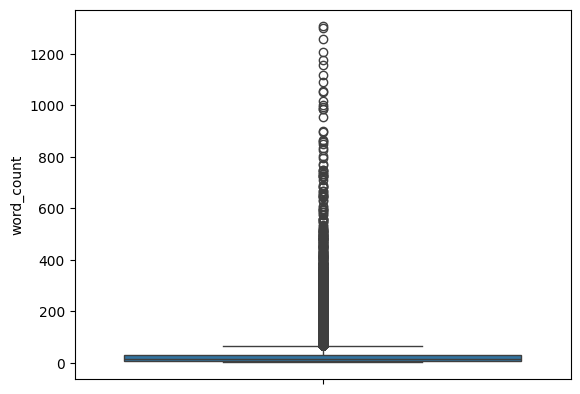

In [29]:
sns.boxplot(df["word_count"])

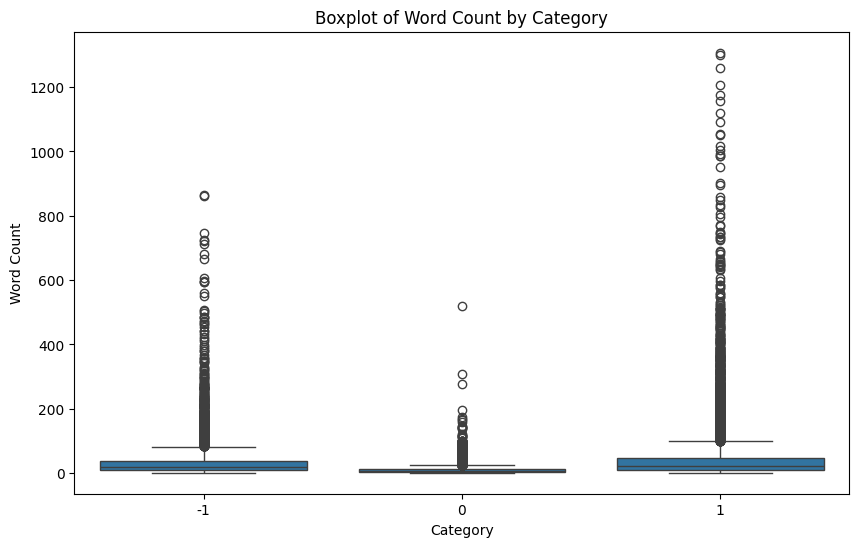

In [30]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

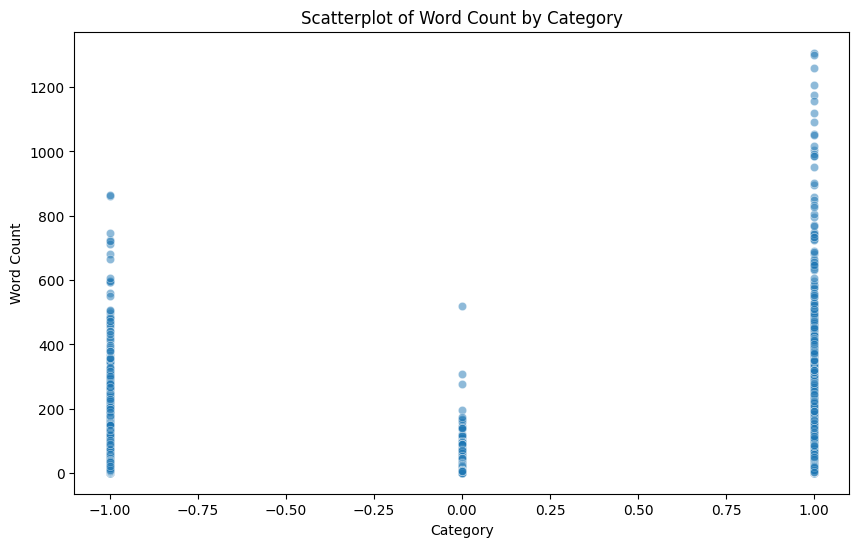

In [31]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

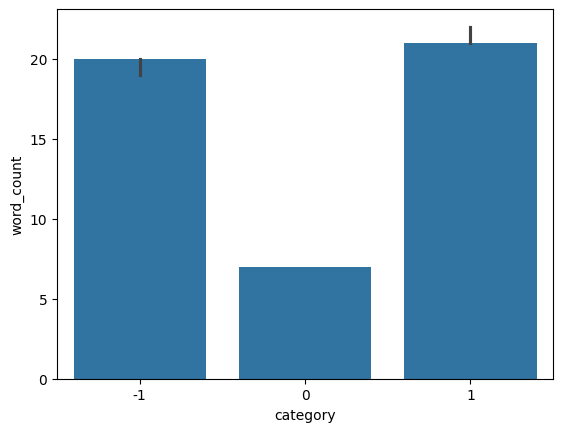

In [32]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

Stopwords Analysis

In [33]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

df["num_stop_words"] = df["clean_comment"].apply(lambda x: len([word for word in x.split() if word in stop_words]))
df.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,clean_comment,category,clean_commnet,word_count,num_stop_words
5918,must ispr handle,0,must ispr handle,3,0
32685,rip hasan,0,rip hasan,2,0
15153,cult escaping difficult but you have done bravo,-1,cult escaping difficult but you have done bravo,8,3
25400,look statue unity written the left side laughable,-1,look statue unity written the left side laughable,8,1
14572,modi looks the other way when there lynching m...,1,modi looks the other way when there lynching ...,63,26


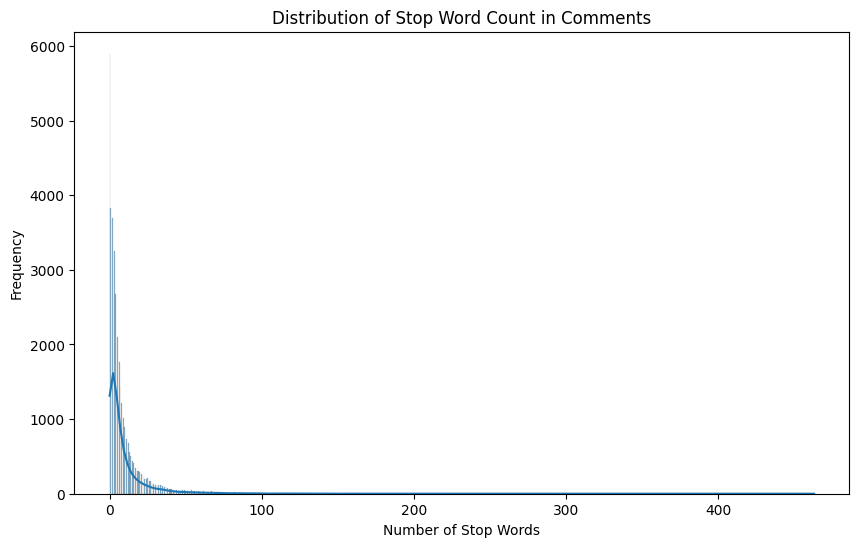

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


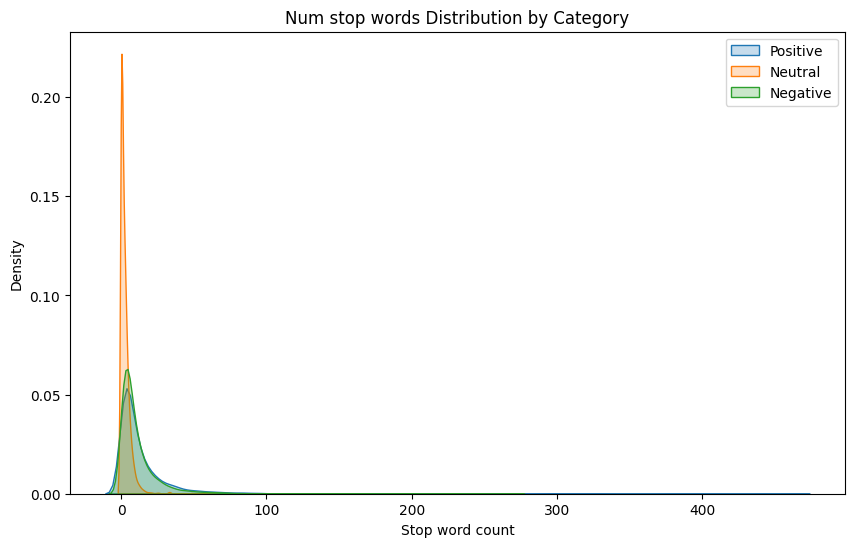

In [35]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

plt.legend()

plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

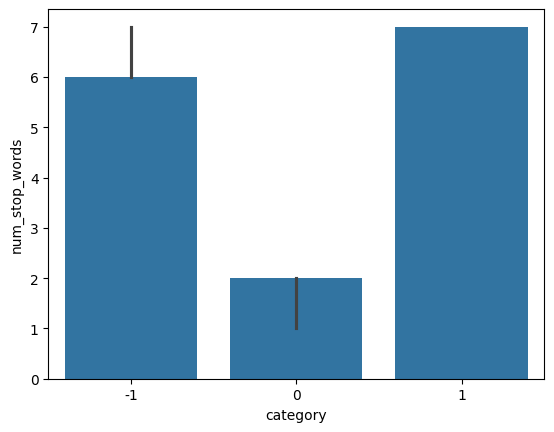

In [36]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

<ipython-input-37-d973b6c8a7f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


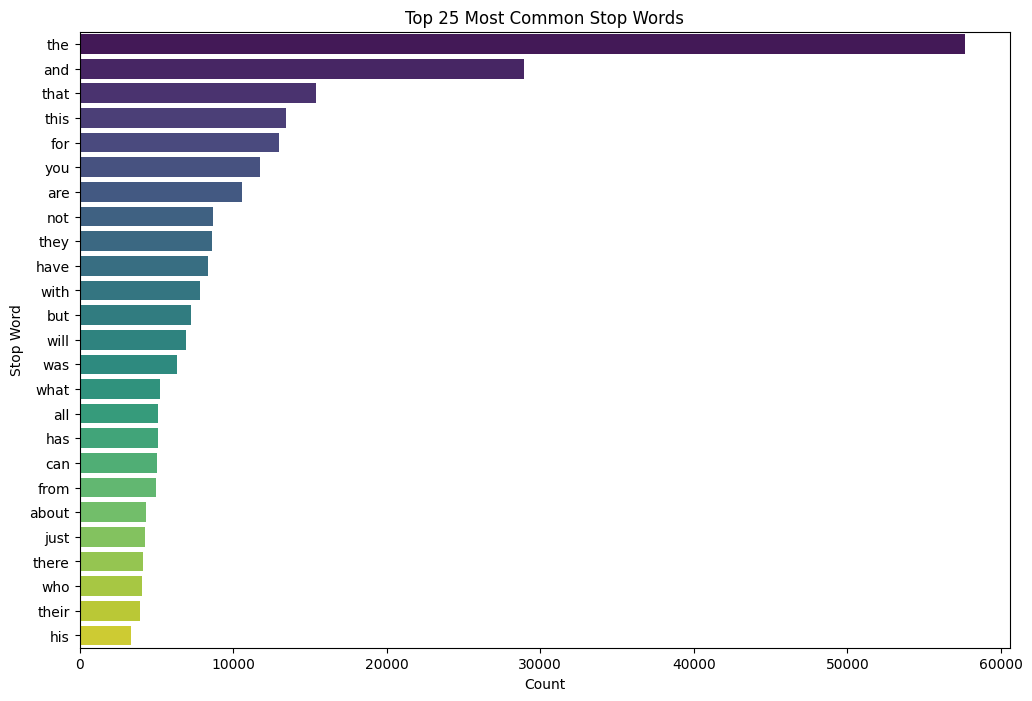

In [37]:
from collections import Counter

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

most_common_stop_words = Counter(all_stop_words).most_common(25)

top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [38]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,clean_commnet,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,family mormon have never tried explain them t...,39,13,259
1,buddhism has very much lot compatible with chr...,1,buddhism has very much lot compatible with chr...,196,59,1268
2,seriously don say thing first all they won get...,-1,seriously don say thing first all they won get...,86,40,459
3,what you have learned yours and only yours wha...,0,what you have learned yours and only yours wha...,29,15,167
4,for your own benefit you may want read living ...,1,for your own benefit you may want read living ...,112,45,690


In [39]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [40]:
from collections import Counter

all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
...,...,...
1345,唯,1
1346,统,1
1330,段,1
1331,她,1


In [41]:
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,clean_commnet,word_count,num_stop_words,num_chars,num_punctuation_chars
29081,finally phew,0,finally phew,2,0,12,0
5318,when congress was banning things people were a...,-1,when congress was banning things people were a...,66,29,399,0
139,that gonna the india pre election orgasm moment,0,that gonna the india pre election orgasm moment,8,2,47,0
23273,any plans about bluetooth support emulator any...,1,any plans about bluetooth support emulator an...,18,5,129,0
31585,congress actually has some very well educated ...,1,congress actually has some very well educated ...,64,24,403,0


<ipython-input-42-0a1e861f808a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


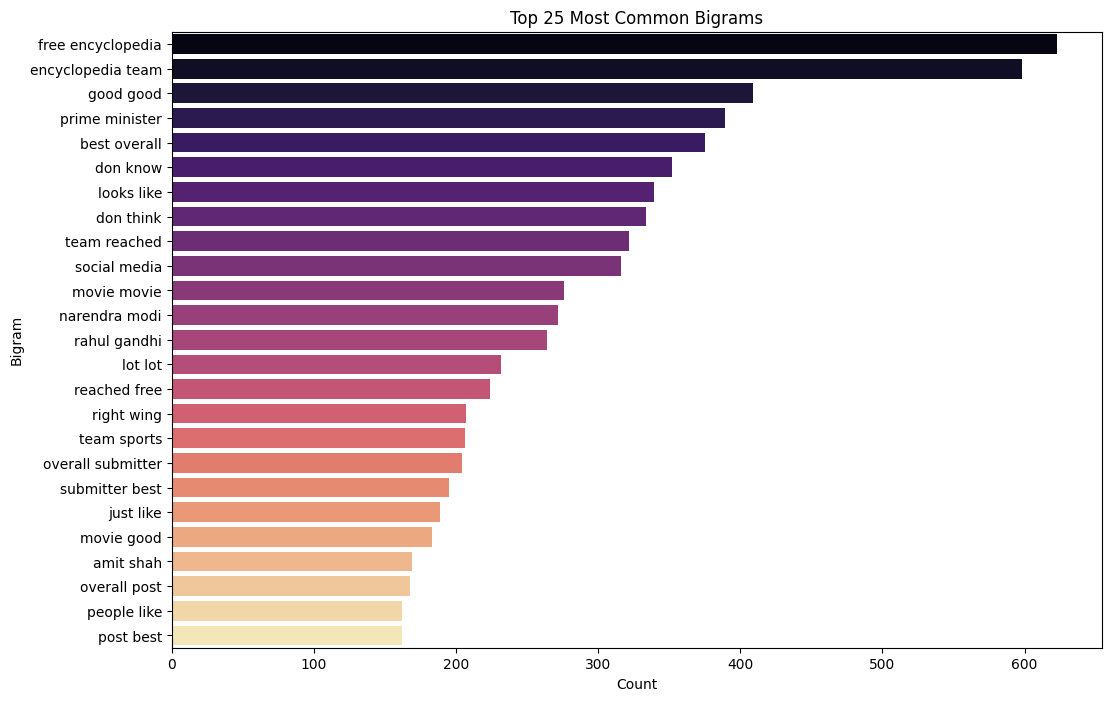

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


<ipython-input-43-098c7efd1a63>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


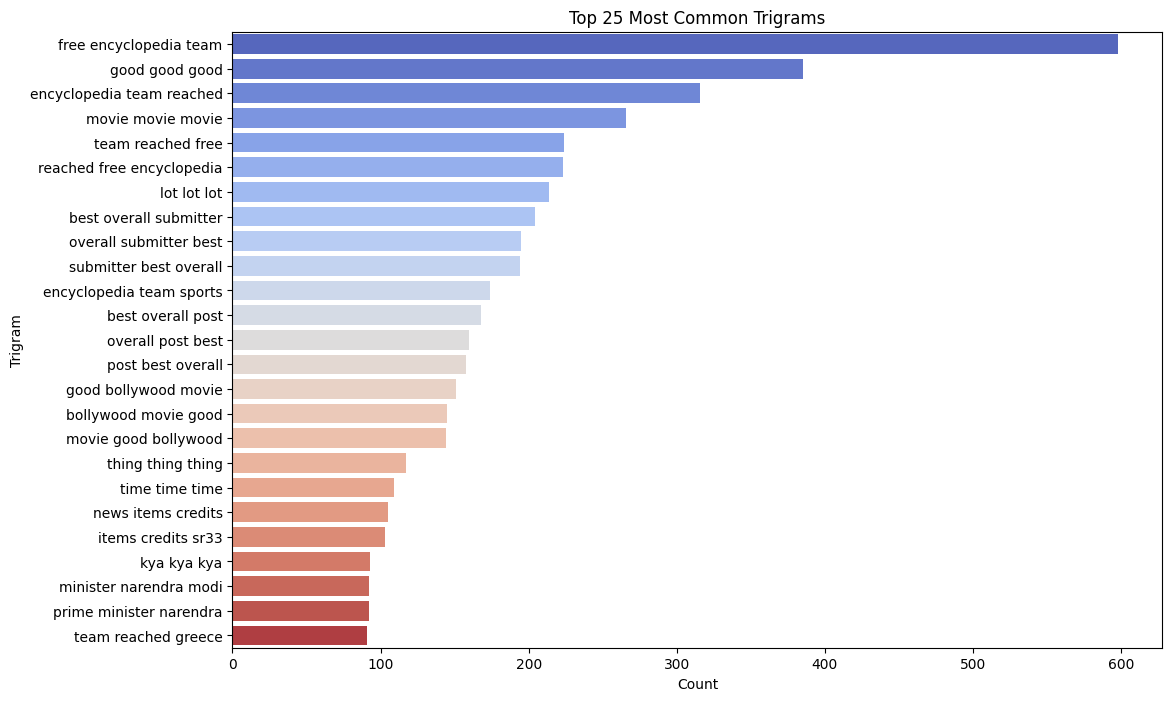

In [43]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

Pre-Processing 2

In [44]:
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [45]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [46]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




In [47]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,clean_commnet,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,family mormon have never tried explain them t...,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,buddhism has very much lot compatible with chr...,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,seriously don say thing first all they won get...,86,40,459,0
3,learned want teach different focus goal not wr...,0,what you have learned yours and only yours wha...,29,15,167,0
4,benefit may want read living buddha living chr...,1,for your own benefit you may want read living ...,112,45,690,0


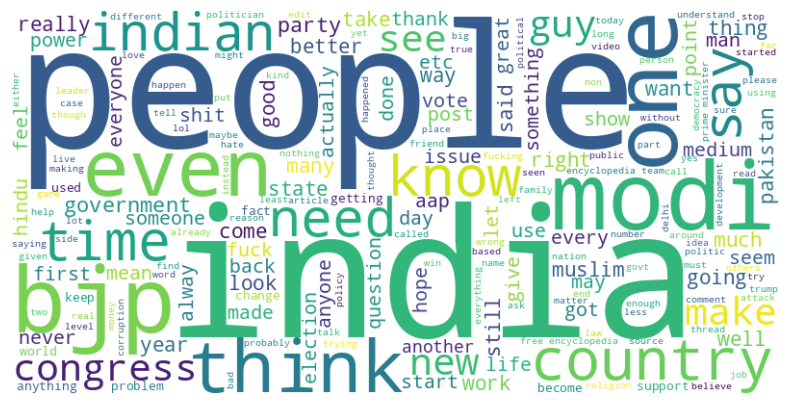

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

We can see in our dataset there is more poticial stuffs


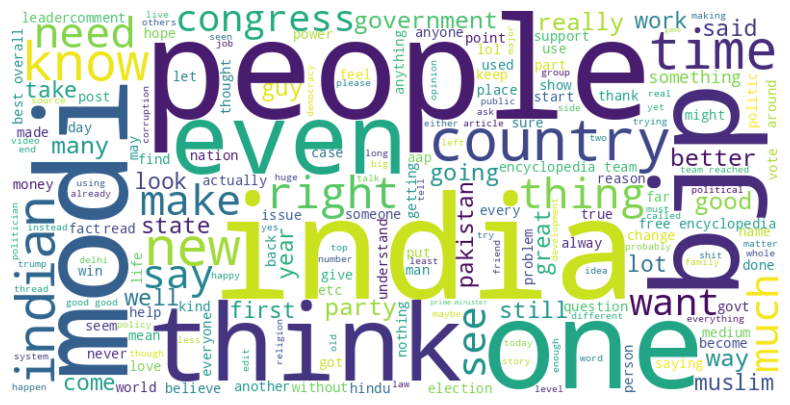

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

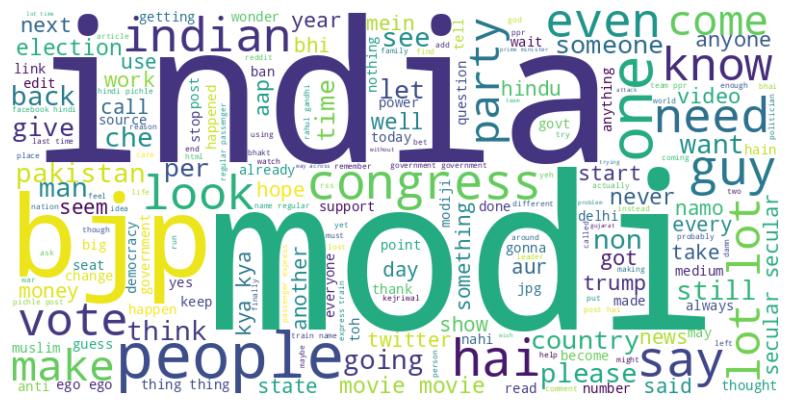

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

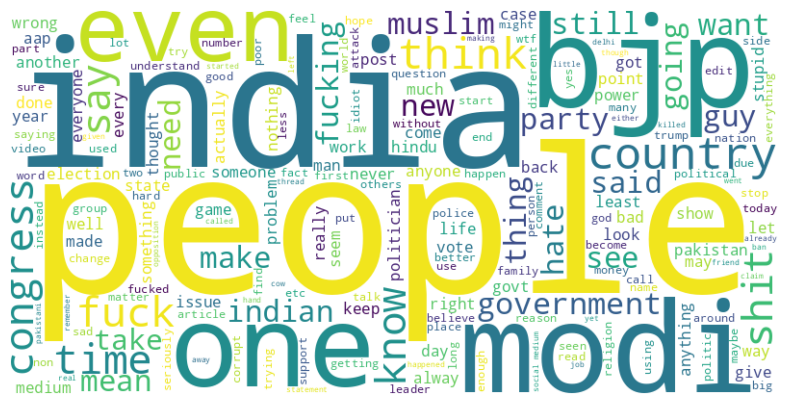

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

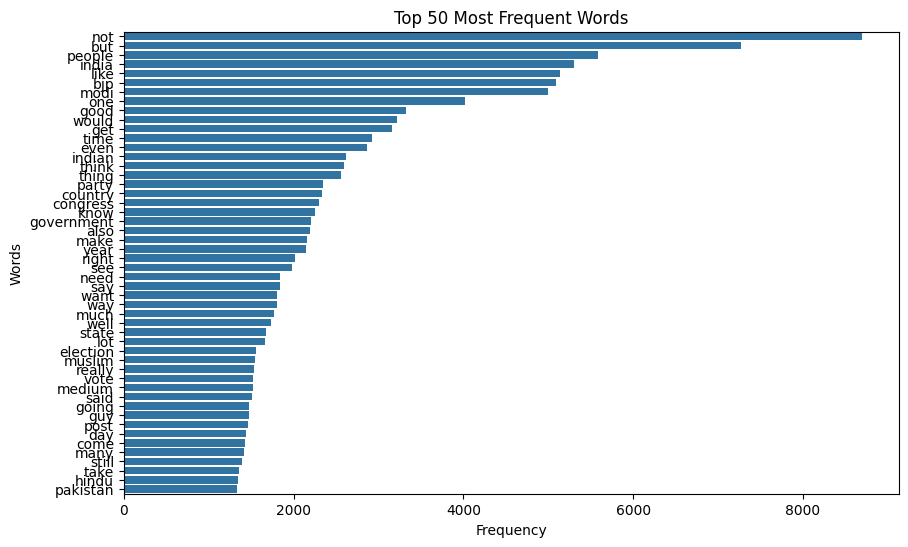

In [52]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_n_words(df, n=50)


In [53]:
df.to_csv("preprocessed_comments_analysis.csv")